# Data analysis

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline

# Scipy offers many statistical functions, among which the Pearson and Spearman correlation measures.
from scipy.stats import pearsonr, spearmanr


### 1) Load datasets from BIN file

In [2]:
import pickle
with open('aida.bin', 'rb') as outfile:
    aida_articles=pickle.load(outfile)
with open('wes2015.bin', 'rb') as outfile:
    wes_articles=pickle.load(outfile)
    
wes_title='wes2015'
aida_title='aida'

### 2) Distribution of AIDA collections 

In [3]:
from collections import defaultdict

d=defaultdict(int)
for article in aida_articles:
    d[article.collection]+=1
d

defaultdict(int, {'aidatesta': 216, 'aidatestb': 231, 'aidatrain': 946})

### 3) Get frequency distributions of forms and instances

In [4]:
all_articles=aida_articles.union(wes_articles)

In [5]:
import time
import plot_utils

t1=time.time()
#print(example_article.identifier)
wes_cnt_instances, wes_cnt_forms=plot_utils.get_mention_counts(wes_articles)
aida_cnt_instances, aida_cnt_forms=plot_utils.get_mention_counts(aida_articles)
all_cnt_instances, all_cnt_forms=plot_utils.get_mention_counts(all_articles)
aida_cnt_instances.pop('--NME--', None)
t2=time.time()


### 4) Plot frequency distribution of FORMS

<span style="background-color:lightgreen">Section 5.1. of the paper</span>

**4.1. Linear plots **

In [6]:
import seaborn as sns
sns.set_style("whitegrid")

In [7]:
save=True

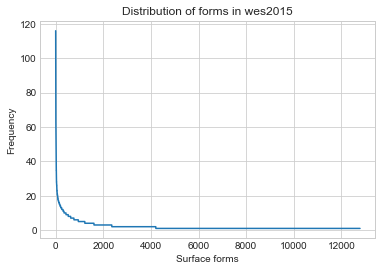

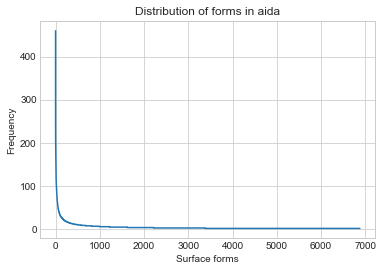

In [8]:
plot_utils.plot_freq_dist(wes_cnt_forms, 'forms in ' + wes_title, 
                          x_axis='Surface forms', save=save)
plot_utils.plot_freq_dist(aida_cnt_forms, 'forms in ' + aida_title, 
                          x_axis='Surface forms', save=save)

**4.2. Log-log plots**

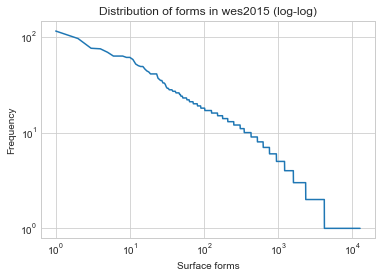

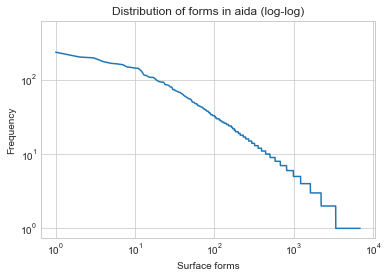

In [9]:
plot_utils.plot_freq_dist(wes_cnt_forms, 'forms in ' + wes_title, 
                          x_axis='Surface forms', loglog=True, 
                          b=10, save=save)
plot_utils.plot_freq_dist(aida_cnt_forms, 'forms in ' + aida_title, 
                          x_axis='Surface forms', loglog=True, 
                          b=10, save=save)

**4.3. Slope** 

In [10]:
import plot_utils
aida_slope=plot_utils.calculate_slope(aida_cnt_forms)
wes_slope=plot_utils.calculate_slope(wes_cnt_forms)
print(aida_slope)
print(wes_slope)

LinregressResult(slope=-0.0022036164183156324, intercept=11.620965629475819, rvalue=-0.37260300743819236, pvalue=1.8815464484624348e-225, stderr=6.6190701161751247e-05)
LinregressResult(slope=-0.00049347163012393794, intercept=5.3903221820524916, rvalue=-0.46468730737613617, pvalue=0.0, stderr=8.3165696362870735e-06)


### 5) Plot frequency distribution of INSTANCES

<span style="background-color:lightgreen">Section 5.1. of the paper</span>

**5.1. Linear plots **

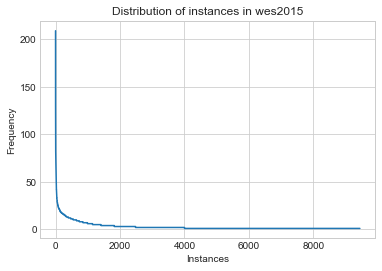

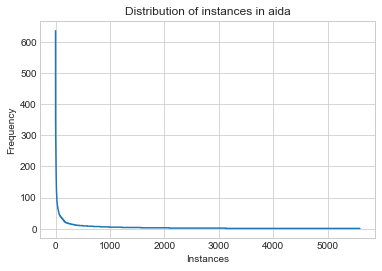

In [11]:
plot_utils.plot_freq_dist(wes_cnt_instances, 'instances in ' + wes_title, 
                          x_axis='Instances', save=save)
plot_utils.plot_freq_dist(aida_cnt_instances, 'instances in ' + aida_title, 
                          x_axis='Instances', save=save)

**5.2. Log-log plots**

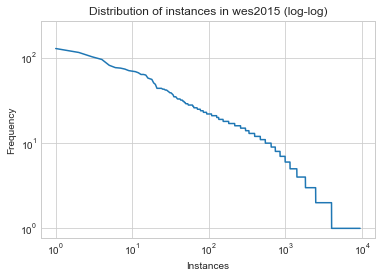

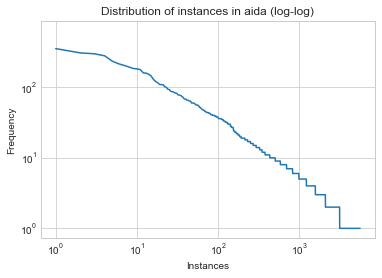

In [12]:
plot_utils.plot_freq_dist(wes_cnt_instances, 'instances in ' + wes_title, 
                          x_axis='Instances', loglog=True, 
                          b=10, save=save)
plot_utils.plot_freq_dist(aida_cnt_instances, 'instances in ' + aida_title, 
                          x_axis='Instances', loglog=True, 
                          b=10, save=save)

**5.3. Slope** 

In [13]:
import plot_utils
aida_slope=plot_utils.calculate_slope(aida_cnt_instances)
wes_slope=plot_utils.calculate_slope(wes_cnt_instances)
print(aida_slope)
print(wes_slope)

LinregressResult(slope=-0.0034990210669294578, intercept=14.75680125464558, rvalue=-0.3382295714741132, pvalue=1.0049300262640952e-149, stderr=0.00013019947269153514)
LinregressResult(slope=-0.00105588227994161, intercept=8.0121420692953293, rvalue=-0.49799538354507872, pvalue=0.0, stderr=1.8923012612086585e-05)


### 6) PageRank distribution of instances


#### 6.1. Obtain pagerank data

In [14]:
skip_zeros=True

wes_pageranks, wes_pr_uniq=plot_utils.get_pagerank_distribution(wes_articles, skip_zeros=skip_zeros)

aida_pageranks, aida_pr_uniq=plot_utils.get_pagerank_distribution(aida_articles, skip_zeros=skip_zeros)

#### 6.2. Plot the PR distribution

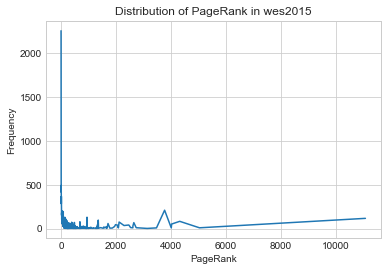

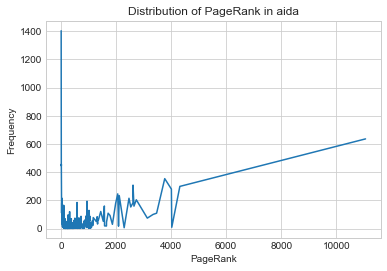

In [15]:
plot_utils.plot_freq_noagg(wes_pageranks, 
                           title='PageRank in ' + wes_title, 
                           x_axis='PageRank', save=save)
plot_utils.plot_freq_noagg(aida_pageranks, 
                           title='PageRank in ' + aida_title, 
                           x_axis='PageRank', save=save)

#### 6.3. Plot the PR distribution (unique instances)

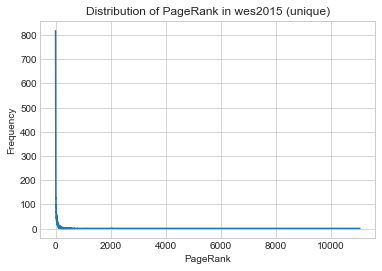

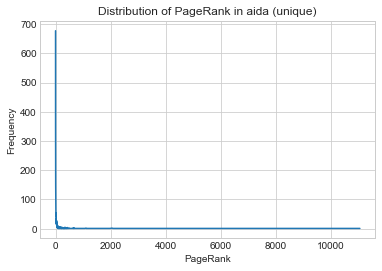

In [16]:
plot_utils.plot_freq_noagg(wes_pr_uniq, 
                           title='PageRank in ' + wes_title + ' (unique)', 
                           x_axis='PageRank', save=save)
plot_utils.plot_freq_noagg(aida_pr_uniq, 
                           title='PageRank in ' + aida_title + ' (unique)', 
                           x_axis='PageRank', save=save)

#### 6.4. Inspect individual pagerank

In [17]:
# United_States has a max pageRank of 11066. 
pr=11066
print(wes_pageranks[pr], wes_pr_uniq[pr])


116 1


In [18]:
import redis
x=redis.Redis()
x.get('pr:United_States')

b'11066.2733'

# Note: from here onwards most plots given stats for both datasets jointly


### 7) Prepare ambiguity and variance data

In [19]:
interpretations, references = plot_utils.get_interpretations_and_references(all_articles, skip_nils=True)

### 8) Aggregation per ambiguity

<span style="background-color:lightgreen">Section 5.2. of the paper</span>

In [20]:
ambiguity={}
for form,meanings in interpretations.items():
    ambiguity[form]=len(meanings)
ambiguity

{'Russia': 2,
 'MOSCOW': 1,
 'Russian': 2,
 'Norilsk Nickel': 1,
 'Moscow': 3,
 'Itar-Tass': 1,
 'International Monetary Fund': 1,
 'Krasnoyarsk': 1,
 'Kurd': 2,
 'Kurdish': 4,
 'Kurdistan Workers Party': 1,
 'PKK': 1,
 'Tunceli': 1,
 'Sirnak': 1,
 'Hakkari': 2,
 'Senate': 1,
 'Saudi': 1,
 'DUBAI': 1,
 'U.S. Senate Intelligence Committee': 1,
 'Arlen Specter': 1,
 'William Perry': 1,
 'Saudi Arabia': 1,
 'U.S.': 2,
 'Riyadh': 1,
 'Specter': 1,
 'Oman': 1,
 'American': 3,
 'Dhahran': 1,
 'Prince Abdullah': 1,
 'Sultan': 1,
 'Jeddah': 1,
 'Saudi Press Agency': 1,
 'Japan': 3,
 'South Korea': 2,
 'China': 4,
 'Pentagon': 1,
 'Perry': 2,
 'Pennsylvania': 1,
 'FBI': 1,
 'Louis Freeh': 1,
 'United States': 3,
 'Shanghai': 1,
 'SHANGHAI': 1,
 'Chinese': 3,
 'Anhui': 1,
 'Hawaii': 1,
 'Chicago': 4,
 'German': 4,
 'English': 5,
 'Mexican': 1,
 'Michoacan': 1,
 'MEXICO CITY': 1,
 'Morelia': 2,
 'AK-47s': 1,
 'Popular Revolutionary Army': 1,
 'SYDNEY': 1,
 'Rupert Murdoch': 1,
 'Independence Day'

In [21]:
agg_per_ambiguity=defaultdict(int)
for form, amb in ambiguity.items():
    agg_per_ambiguity[amb]+=1

In [22]:
agg_per_ambiguity

defaultdict(int, {1: 18234, 2: 813, 3: 160, 4: 49, 5: 16, 6: 6, 7: 1, 12: 1})

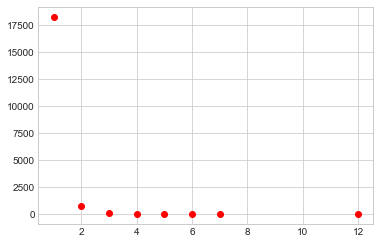

In [23]:
import matplotlib.pyplot as plt

plt.plot(list(agg_per_ambiguity.keys()), list(agg_per_ambiguity.values()), 'ro')
plt.show()

In [24]:
sum(i for j,i in agg_per_ambiguity.items() if j>1)

1046

#### AIDA: This means that there are 622 (or 477 without NILs) out of ~11k forms that have some ambiguity in the data

### 9) Aggregation per variance

<span style="background-color:lightgreen">Section 5.3. of the paper</span>

In [25]:
variance={}
for meaning,forms in references.items():
    variance[meaning]=len(forms)
variance

{'Russia': 9,
 'Moscow': 2,
 'Norilsk_Nickel': 1,
 'Russian_News_Agency_TASS': 1,
 'International_Monetary_Fund': 1,
 'Krasnoyarsk_Krai': 1,
 'Kurdistan': 3,
 "Kurdistan_Workers'_Party": 2,
 'Tunceli_Province': 1,
 'Şırnak_Province': 1,
 'Hakkâri': 1,
 'United_States_Senate_Committee_on_Armed_Services': 1,
 'Saudi_Arabia': 3,
 'Dubai': 2,
 'United_States_Senate_Select_Committee_on_Intelligence': 1,
 'Arlen_Specter': 2,
 'William_Perry': 2,
 'United_States': 18,
 'Riyadh': 1,
 'Oman': 1,
 'Dhahran': 1,
 'Abdullah_of_Saudi_Arabia': 1,
 'Sultan_bin_Abdulaziz': 1,
 'Jeddah': 1,
 'Saudi_Press_Agency': 1,
 'Japan': 4,
 'South_Korea': 10,
 'China': 4,
 'The_Pentagon': 1,
 'Pennsylvania': 1,
 'Federal_Bureau_of_Investigation': 3,
 'Louis_Freeh': 1,
 'Shanghai': 2,
 'Anhui': 1,
 'Hawaii': 1,
 'Chicago': 3,
 'German_language': 3,
 'English_language': 2,
 'Mexico': 3,
 'Michoacán': 1,
 'Mexico_City': 3,
 'Morelia': 1,
 'AK-47': 5,
 'Popular_Revolutionary_Army': 1,
 'Sydney': 2,
 'Rupert_Murdoch':

In [26]:
agg_per_variance=defaultdict(int)
for uri, v in variance.items():
    agg_per_variance[v]+=1

In [27]:
agg_per_variance

defaultdict(int,
            {1: 10924,
             2: 2530,
             3: 759,
             4: 278,
             5: 110,
             6: 50,
             7: 19,
             8: 17,
             9: 6,
             10: 1,
             11: 1,
             12: 6,
             14: 1,
             18: 1})

In [28]:
sum(i for j,i in agg_per_variance.items() if j>1)

3779

### 10) Correlation between frequency of forms and ambiguity

<span style="background-color:lightgreen">Section 5.4. of the paper</span>

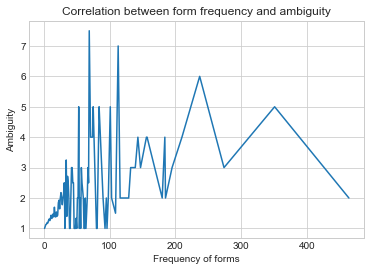

In [29]:
plot_utils.frequency_correlation(all_cnt_forms, 
                                 ambiguity, 
                                 title='Correlation between form frequency and ambiguity', 
                                 x_label='Frequency of forms', 
                                 y_label='Ambiguity',
                                 save=save)

In [30]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline




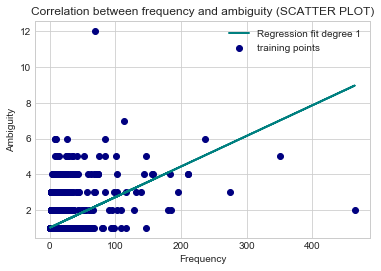

In [31]:
form_x_freq, form_y_amb = plot_utils.prepare_scatter_plot(
    all_cnt_forms, ambiguity)

plot_utils.scatter_plot(form_x_freq, form_y_amb, 
                        x_axis='Frequency',
                        y_axis='Ambiguity',
                        title='Correlation between frequency and ambiguity (SCATTER PLOT)',
                        save=True,
                        degree=1
                        )


In [32]:

correlation, significance = spearmanr(form_x_freq,form_y_amb)
print('The Spearman correlation between X and Y is:', correlation, '. Significance: ', significance)

The Spearman correlation between X and Y is: 0.35559163525 . Significance:  0.0


### 11) Correlation between frequency of instances and variance

<span style="background-color:lightgreen">Section 5.4. of the paper</span>

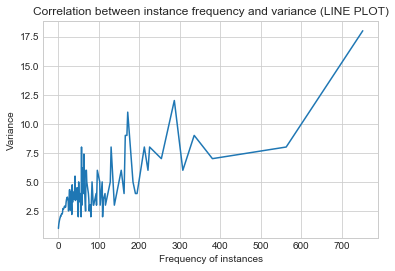

In [33]:
plot_utils.frequency_correlation(all_cnt_instances, 
                                 variance, 
                                 title='Correlation between instance frequency and variance (LINE PLOT)', 
                                 x_label='Frequency of instances', 
                                 y_label='Variance',
                                 save=save)

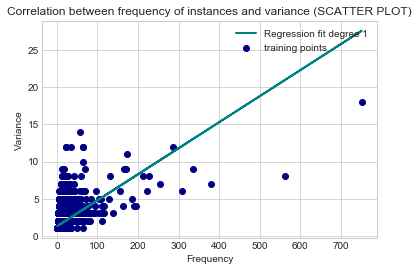

In [34]:

insta_x_freq, insta_y_var = plot_utils.prepare_scatter_plot(
    all_cnt_instances, variance)


plot_utils.scatter_plot(insta_x_freq, insta_y_var, 
                        x_axis='Frequency',
                        y_axis='Variance',
                        title='Correlation between frequency of instances and variance (SCATTER PLOT)',
                        save=True
                        )


In [35]:
correlation, significance = spearmanr(insta_x_freq, insta_y_var)
print('The Spearman correlation between X and Y is:', correlation, '. Significance: ', significance)

The Spearman correlation between X and Y is: 0.677235993586 . Significance:  0.0


### 12) Correlation between PageRank and variance

<span style="background-color:lightgreen">Section 5.4. of the paper</span>

In [36]:
all_pr_instances = {}
for article in all_articles:
    for mention in article.entity_mentions:
        if mention.gold_link!='--NME--' and (not skip_zeros or int(mention.gold_pr)>0):
            all_pr_instances[mention.gold_link]=int(mention.gold_pr)

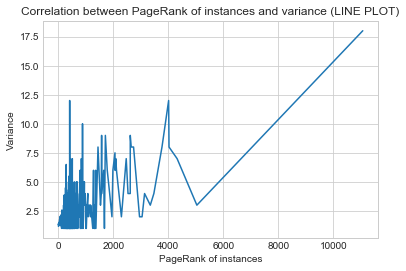

In [37]:
plot_utils.frequency_correlation(all_pr_instances, 
                                 variance, 
                                 title='Correlation between PageRank of instances and variance (LINE PLOT)',
                                 x_label='PageRank of instances', 
                                 y_label='Variance',
                                 save=save)

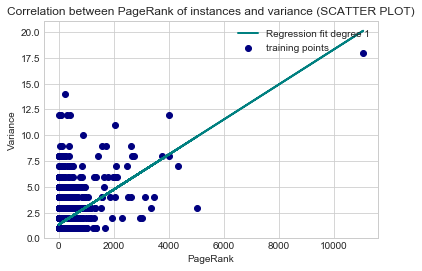

In [38]:
insta_x_pr, insta_y_var2 = plot_utils.prepare_scatter_plot(
    all_pr_instances, variance)

plot_utils.scatter_plot(insta_x_pr, insta_y_var2, 
                        x_axis='PageRank',
                        y_axis='Variance',
                        title='Correlation between PageRank of instances and variance (SCATTER PLOT)',
                        save=True
                        )

In [39]:
correlation, significance = spearmanr(insta_x_pr, insta_y_var2)
print('The Spearman correlation between X and Y is:', correlation, '. Significance: ', significance)

The Spearman correlation between X and Y is: 0.247163013066 . Significance:  3.36102419775e-171


### 13) Correlation between PageRank and frequency

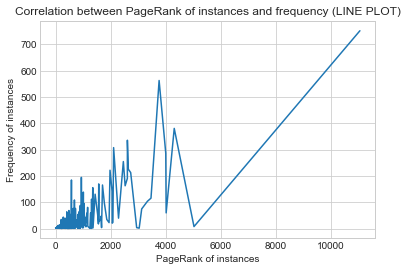

In [40]:
plot_utils.frequency_correlation(all_pr_instances, 
                                 all_cnt_instances, 
                                 title='Correlation between PageRank of instances and frequency (LINE PLOT)', 
                                 x_label='PageRank of instances', 
                                 y_label='Frequency of instances',
                                 save=save)

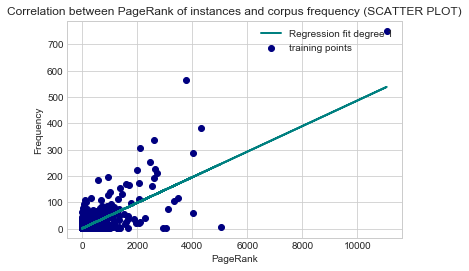

In [41]:
insta_x_pr_2, insta_y_freq2 = plot_utils.prepare_scatter_plot(
    all_pr_instances, all_cnt_instances)

plot_utils.scatter_plot(insta_x_pr_2, insta_y_freq2, 
                        x_axis='PageRank',
                        y_axis='Frequency',
                        title='Correlation between PageRank of instances and corpus frequency (SCATTER PLOT)',
                        save=True
                        )

In [42]:
correlation, significance = spearmanr(insta_x_pr_2, insta_y_freq2)
print('The Spearman correlation between X and Y is:', correlation, '. Significance: ', significance)

The Spearman correlation between X and Y is: 0.204178962887 . Significance:  2.64077939155e-116


### 14) Inspection of the distribution within the instances of a single form

<span style="background-color:lightgreen">Section 5.5. of the paper</span>

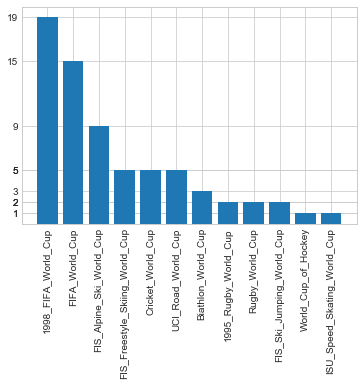

In [43]:
form='World Cup' # this is the form with max ambiguity (of 12) in our dataset

fig = plt.figure()

insts=plot_utils.get_form_distribution(all_articles, form)

import numpy as np
import matplotlib.pyplot as plt
ks=[]
vs=[]
for kv in insts:
    ks.append(kv[0])
    vs.append(kv[1])

x = np.arange(len(ks))

plt.bar(x, vs)
plt.xticks(x, ks, rotation=90)
plt.yticks(vs)

fig.savefig('img/world_cup_form.png', bbox_inches='tight')

### 15) Inspection of the distribution of PageRank within the instances of a single form

<span style="background-color:lightgreen">Section 5.5. of the paper</span>

UCI_Road_World_Cup 	 4
FIS_Alpine_Ski_World_Cup 	 21
Rugby_World_Cup 	 52
FIS_Ski_Jumping_World_Cup 	 9
1998_FIFA_World_Cup 	 59
Cricket_World_Cup 	 34
World_Cup_of_Hockey 	 6
Biathlon_World_Cup 	 5
1995_Rugby_World_Cup 	 16
ISU_Speed_Skating_World_Cup 	 3
FIFA_World_Cup 	 186
FIS_Freestyle_Skiing_World_Cup 	 3


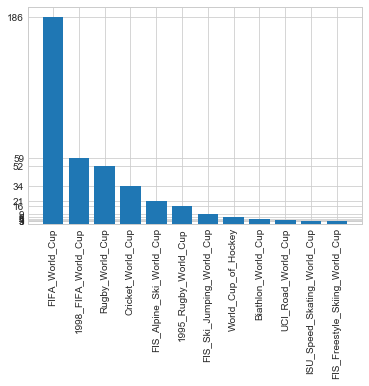

In [44]:
form='World Cup' # this is the form with max ambiguity
import operator

fig = plt.figure()

ks=[]
vs=[]
entries={}
for instance in interpretations[form]:
    print(instance, '\t', all_pr_instances[instance])
    entries[instance]=all_pr_instances[instance]

    
entries = sorted(entries.items(),key = operator.itemgetter(1),reverse = True)

for k,v in entries:
    ks.append(k)
    vs.append(v)

x = np.arange(len(ks))

plt.bar(x, vs)
plt.xticks(x, ks, rotation=90)
plt.yticks(vs)

fig.savefig('img/world_cup_form_pr.png', bbox_inches='tight')

### 16) Inspection of the frequency distribution within the forms of a single instance

<span style="background-color:lightgreen">Section 5.5. of the paper</span>

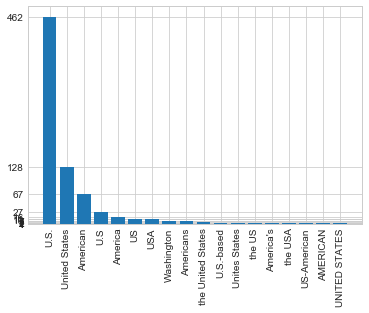

In [45]:
instance='United_States' # this is both the instance with max variance and max frequency

refs=plot_utils.get_instance_distribution(all_articles, instance)

refs

fig = plt.figure()

ks=[]
vs=[]
for kv in refs:
    ks.append(kv[0])
    vs.append(kv[1])

x = np.arange(len(ks))

plt.bar(x, vs)
plt.xticks(x, ks, rotation=90)
plt.yticks(vs)

fig.savefig('img/united_states_insta.png', bbox_inches='tight')

### 17) Entropy

In [46]:
from scipy.stats import entropy
all_entropies=[]
for form in interpretations:
    counts=plot_utils.get_form_counts(all_articles, form)
    counts=list(counts)
    all_entropies.append(entropy(counts, base=len(counts)))

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:2519: RuntimeWarning: invalid value encountered in double_scalars
  S /= log(base)


ValueError: cannot convert float NaN to integer

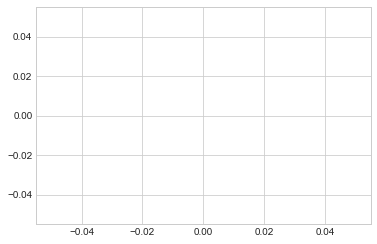

In [47]:


sns.distplot(all_entropies, kde=False)

In [ ]:
all_entropies_lz = []
for ent in all_entropies:
    if ent>0.0:
        all_entropies_lz.append(ent)

In [ ]:
len(all_entropies_lz)

In [ ]:
sns.distplot(all_entropies_lz, kde=False)

In [ ]:
all_entropies_lz